<a href="https://colab.research.google.com/github/sanjaykmenon/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Copy_of_LS_DS_111_A_First_Look_at_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [0]:
2 + 2

4

## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

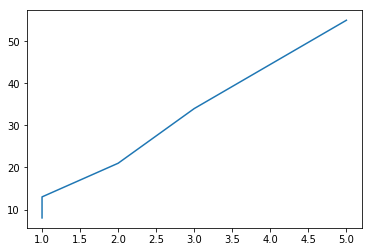

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example
import matplotlib.pyplot as plt
x = [1,1,2,3,5]
y = [8,13,21,34,55]

plt.plot(x,y)


### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

2.  What was the most challenging part of what you did?

3.  What was the most interesting thing you learned?

4.  What area would you like to explore with more time?




1. I created a linear plot of the first five numbers and the next five numbers in a fibonacci sequence using matplotlib since I wanted to see if there is a trend to the series.

2. It seems that there is an exponential increase in the values of numbers as the series moves further along, but right now, I have only plotted the first 10 numbers. I will need to see how this turns out when I plot the first 100 / 1000 numbers in this sequence.

3. The initial two terms are pretty much the same point, but after that it seems there is a huge increase in the values.

4. I would like to see and analyze trends between different data points that have a huge number of data points.

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about.

In [0]:
Wrote a blog post on sanjaykmenon.github.io

need to find an interesting article
